In [3]:
import sys
import os
import nibabel as nb
import numpy as np
import ext.neuron
import lab2im
import matplotlib.pyplot as plt
basepath = os.getcwd()

In [4]:
# Very simple script showing how to generate new images with random contrast

import os
from lab2im import utils
from lab2im.image_generator import ImageGenerator

os.chdir(basepath + '/tutorials/')
# path of the input label map
path_label_map = './data_example/brain_label_map.nii.gz'
# path where to save the generated image
resulr_dir = './generated_images'

# generate an image from the label map.
# Because the image is spatially deformed, we also output the corresponding deformed label map.
brain_generator = ImageGenerator(path_label_map)
im, lab = brain_generator.generate_image()

# save output image and label map
if not os.path.exists(os.path.join(resulr_dir)):
    os.mkdir(resulr_dir)
utils.save_volume(im, brain_generator.aff, brain_generator.header, os.path.join(resulr_dir, 'brain.nii.gz'))
utils.save_volume(lab, brain_generator.aff, brain_generator.header, os.path.join(resulr_dir, 'labels.nii.gz'))

Compiling list of unique labels
processing 1/1


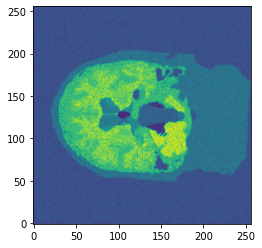

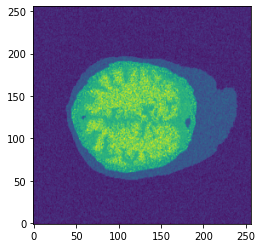

In [5]:
os.chdir(basepath + '/tutorials/generated_images/')
im = nb.load('brain.nii.gz')
label = nb.load('labels.nii.gz')
im = np.array(im.dataobj)
label = np.array(label.dataobj)
plt.imshow(im[:,:,128],origin='lower')
plt.show()
plt.imshow(im[:,:,80],origin='lower')
plt.show()

(512, 512, 256)


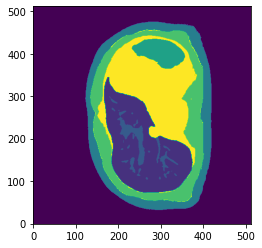

In [6]:
os.chdir(basepath)
liver = nb.load('liver_all_parts_seg_20180410.nii.gz')
liver = np.array(liver.dataobj)
print(liver.shape)
plt.imshow(liver[:,:,128],origin='lower')
plt.show()

In [7]:
# Very simple script showing how to generate new images with random contrast

import os
from lab2im import utils
from lab2im.image_generator import ImageGenerator

os.chdir(basepath)
# path of the input label map
path_label_map = './liver_all_parts_seg_20180410.nii.gz'
# path where to save the generated image
resulr_dir = './generated_images'

# generate an image from the label map.
# Because the image is spatially deformed, we also output the corresponding deformed label map.
brain_generator = ImageGenerator(path_label_map)
im, lab = brain_generator.generate_image()

# save output image and label map
if not os.path.exists(os.path.join(resulr_dir)):
    os.mkdir(resulr_dir)
utils.save_volume(im, brain_generator.aff, brain_generator.header, os.path.join(resulr_dir, 'liver.nii.gz'))
utils.save_volume(lab, brain_generator.aff, brain_generator.header, os.path.join(resulr_dir, 'labels.nii.gz'))

Compiling list of unique labels
processing 1/1


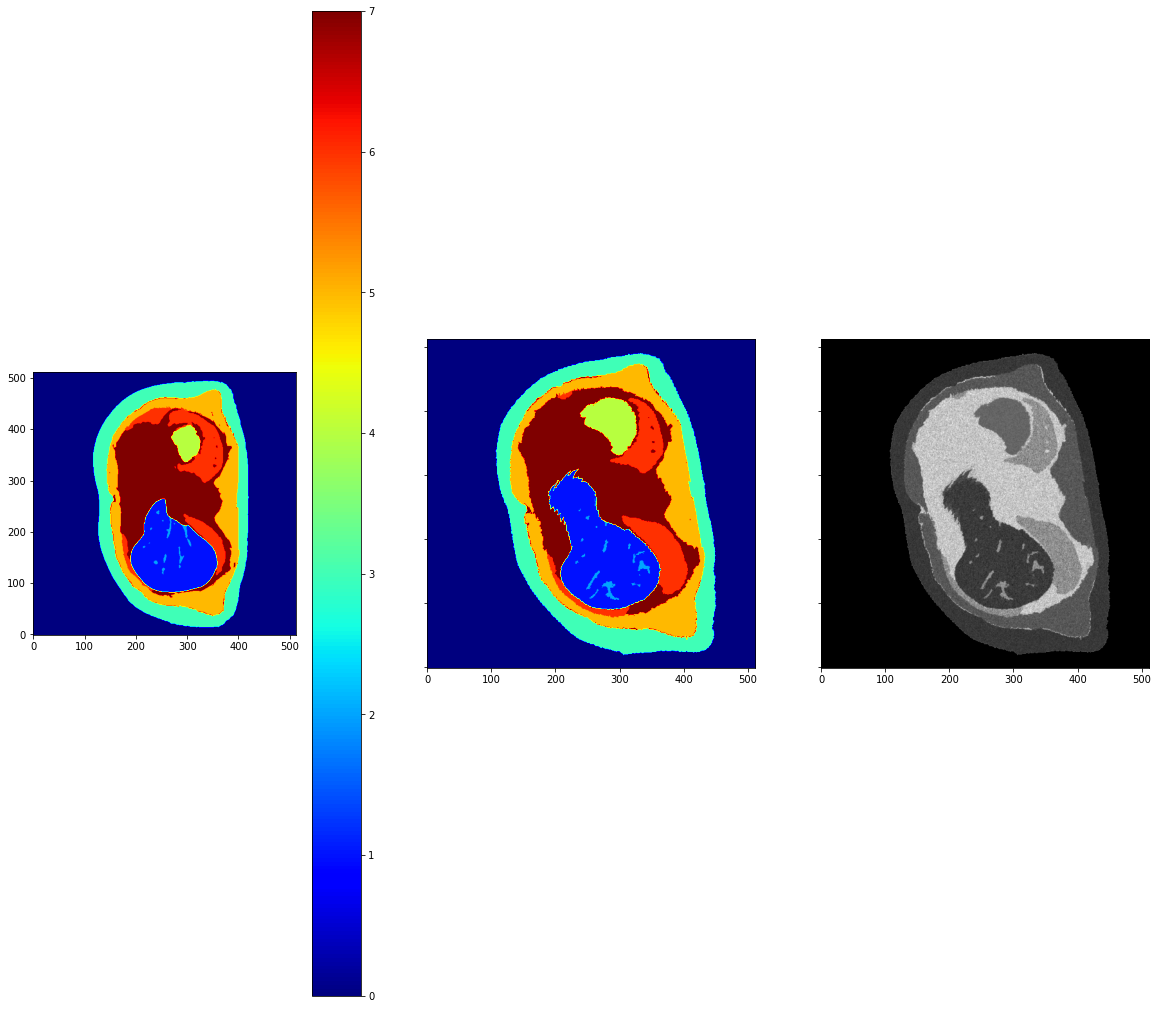

In [16]:
os.chdir(basepath + '/generated_images/')
im = nb.load('liver.nii.gz')
label = nb.load('labels.nii.gz')
im = np.array(im.dataobj)
label = np.array(label.dataobj)
sl = 180
fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,figsize=(20,20))
ax1.imshow(liver[:,:,sl],origin='lower',cmap='jet')
plt.colorbar(plt.imshow(liver[:,:,sl],cmap='jet'),ax=ax1)
ax2.imshow(label[:,:,sl],origin='lower',cmap='jet')
ax3.imshow(im[:,:,sl],origin='lower',cmap='gray')
plt.show()

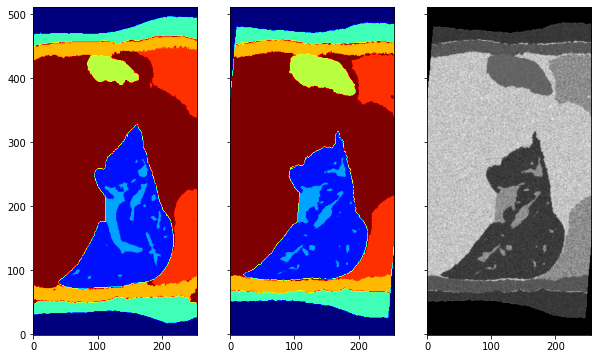

In [9]:
os.chdir(basepath + '/generated_images/')
im = nb.load('liver.nii.gz')
label = nb.load('labels.nii.gz')
im = np.array(im.dataobj)
label = np.array(label.dataobj)
sl = 256
fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,figsize=(10,10))
ax1.imshow(liver[:,sl,:],origin='lower',cmap='jet')
ax2.imshow(label[:,sl,:],origin='lower',cmap='jet')
ax3.imshow(im[:,sl,:],origin='lower',cmap='gray')
plt.show()

In [11]:
os.chdir(basepath+'/tutorials/data_example')
classes = np.load('generation_classes.npy')
print(classes)

[ 0  3  3  4  3  3 17 16 15 14  1  2  3  3  1  2  5  6  7  8  9 10 11 12
  3 13]


In [20]:
# classes and numbers: 0: background, 1: liver, 2: vasculature in liver, 3: fat, 4: spleen, 5: muscle, 6: lung, 7: general organs
# need to assign susceptibility values to these.
os.chdir(basepath)
liver_means = np.array([0, -6, -9, -7, -7.12, -7.38, 0, -9])
np.save('liver_means.npy',liver_means)
liver_std = np.array([2, 4, 2, 2, 2, 2, 2, 2])
np.save('liver_std.npy',liver_std)